## Final Project Submission

Please fill out:
* Student name: DASARI SRUTHI
* Student pace: part time 
* Scheduled project review date/time: 30-11-2023
* Instructor name: HARDIK IDNANI
* Blog post URL:


 ### step1: import and explore the data

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read our housing csv file into data
data = pd.read_csv("C:/Users/vasun/data-analyst/housing-project2/data/kc_house_data.csv")

In [3]:
#check first 5 rows of our data
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
#check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### step2: cleaning data

In [5]:
#lets look at sqft_basement 
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [6]:
#convert ? to null values and convert string into float
data['sqft_basement'].replace("?", np.nan, inplace =True)
data['sqft_basement'] = data['sqft_basement'].astype('float')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: >

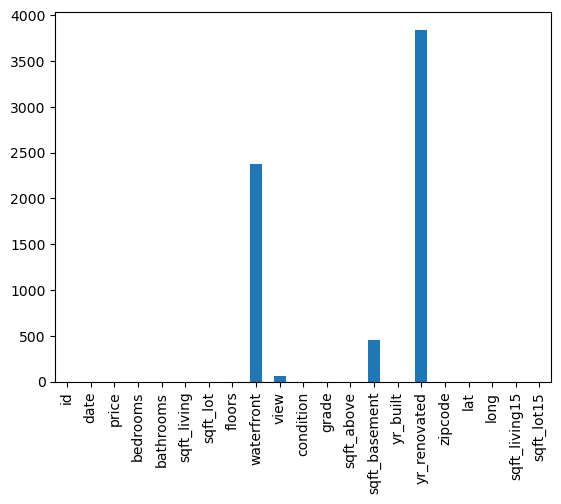

In [8]:
#check null values
data.isna().sum().plot.bar()

In [9]:
#replace null values into mean or median of perticular column 
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [10]:
data['waterfront'] = data['waterfront'].fillna(value = data['waterfront'].median())

In [11]:
data['bathrooms'].unique

<bound method Series.unique of 0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64>

In [12]:
data['bathrooms'] = round(data['bathrooms'])

In [13]:
data['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [14]:
data['view'] = data['view'].fillna(value = data['view'].median())

In [15]:
data['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [16]:
data['sqft_basement'] = data['sqft_basement'].fillna(value = data['sqft_basement'].median())

In [17]:
data['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [18]:
data['yr_renovated'] = data['yr_renovated'].fillna(value = data['yr_renovated'].median())

In [19]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### step3: remove outliers

In [20]:
#drop unnessary columns
data.drop(['id'],axis = 1, inplace = True)

In [21]:
data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3        1.0         1180      5650     1.0   
1   12/9/2014  538000.0         3        2.0         2570      7242     2.0   
2   2/25/2015  180000.0         2        1.0          770     10000     1.0   
3   12/9/2014  604000.0         4        3.0         1960      5000     1.0   
4   2/18/2015  510000.0         3        2.0         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           0.0    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [22]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.059777   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.754435    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.000000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      2.000000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676     68.758207  98077.951845   
std      827.759761     439.819830     29.375234    364.037499     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

<Axes: >

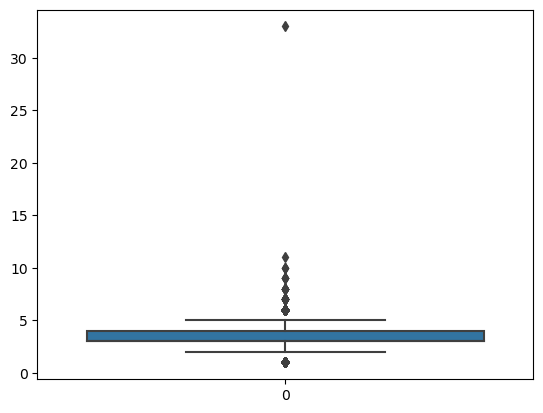

In [23]:
#from above percentails lets check bedrooms
sns.boxplot(data.bedrooms)

In [24]:
data['bedrooms'].sort_values(ascending = False)

15856    33
8748     11
13301    10
19239    10
15147    10
         ..
12472     1
13316     1
7010      1
3578      1
14373     1
Name: bedrooms, Length: 21597, dtype: int64

In [25]:
data.loc[[15856]]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  6/25/2014  640000.0        33        2.0         1620      6000   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856     1.0         0.0   0.0          5      7        1040          580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947           0.0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15856        4700

In [26]:
#we can see in 1040 sqft_above it is imposible to build 33 bedroms so we can remove this outlier.
data = data.drop(15856)

### step4 : multicolinearity

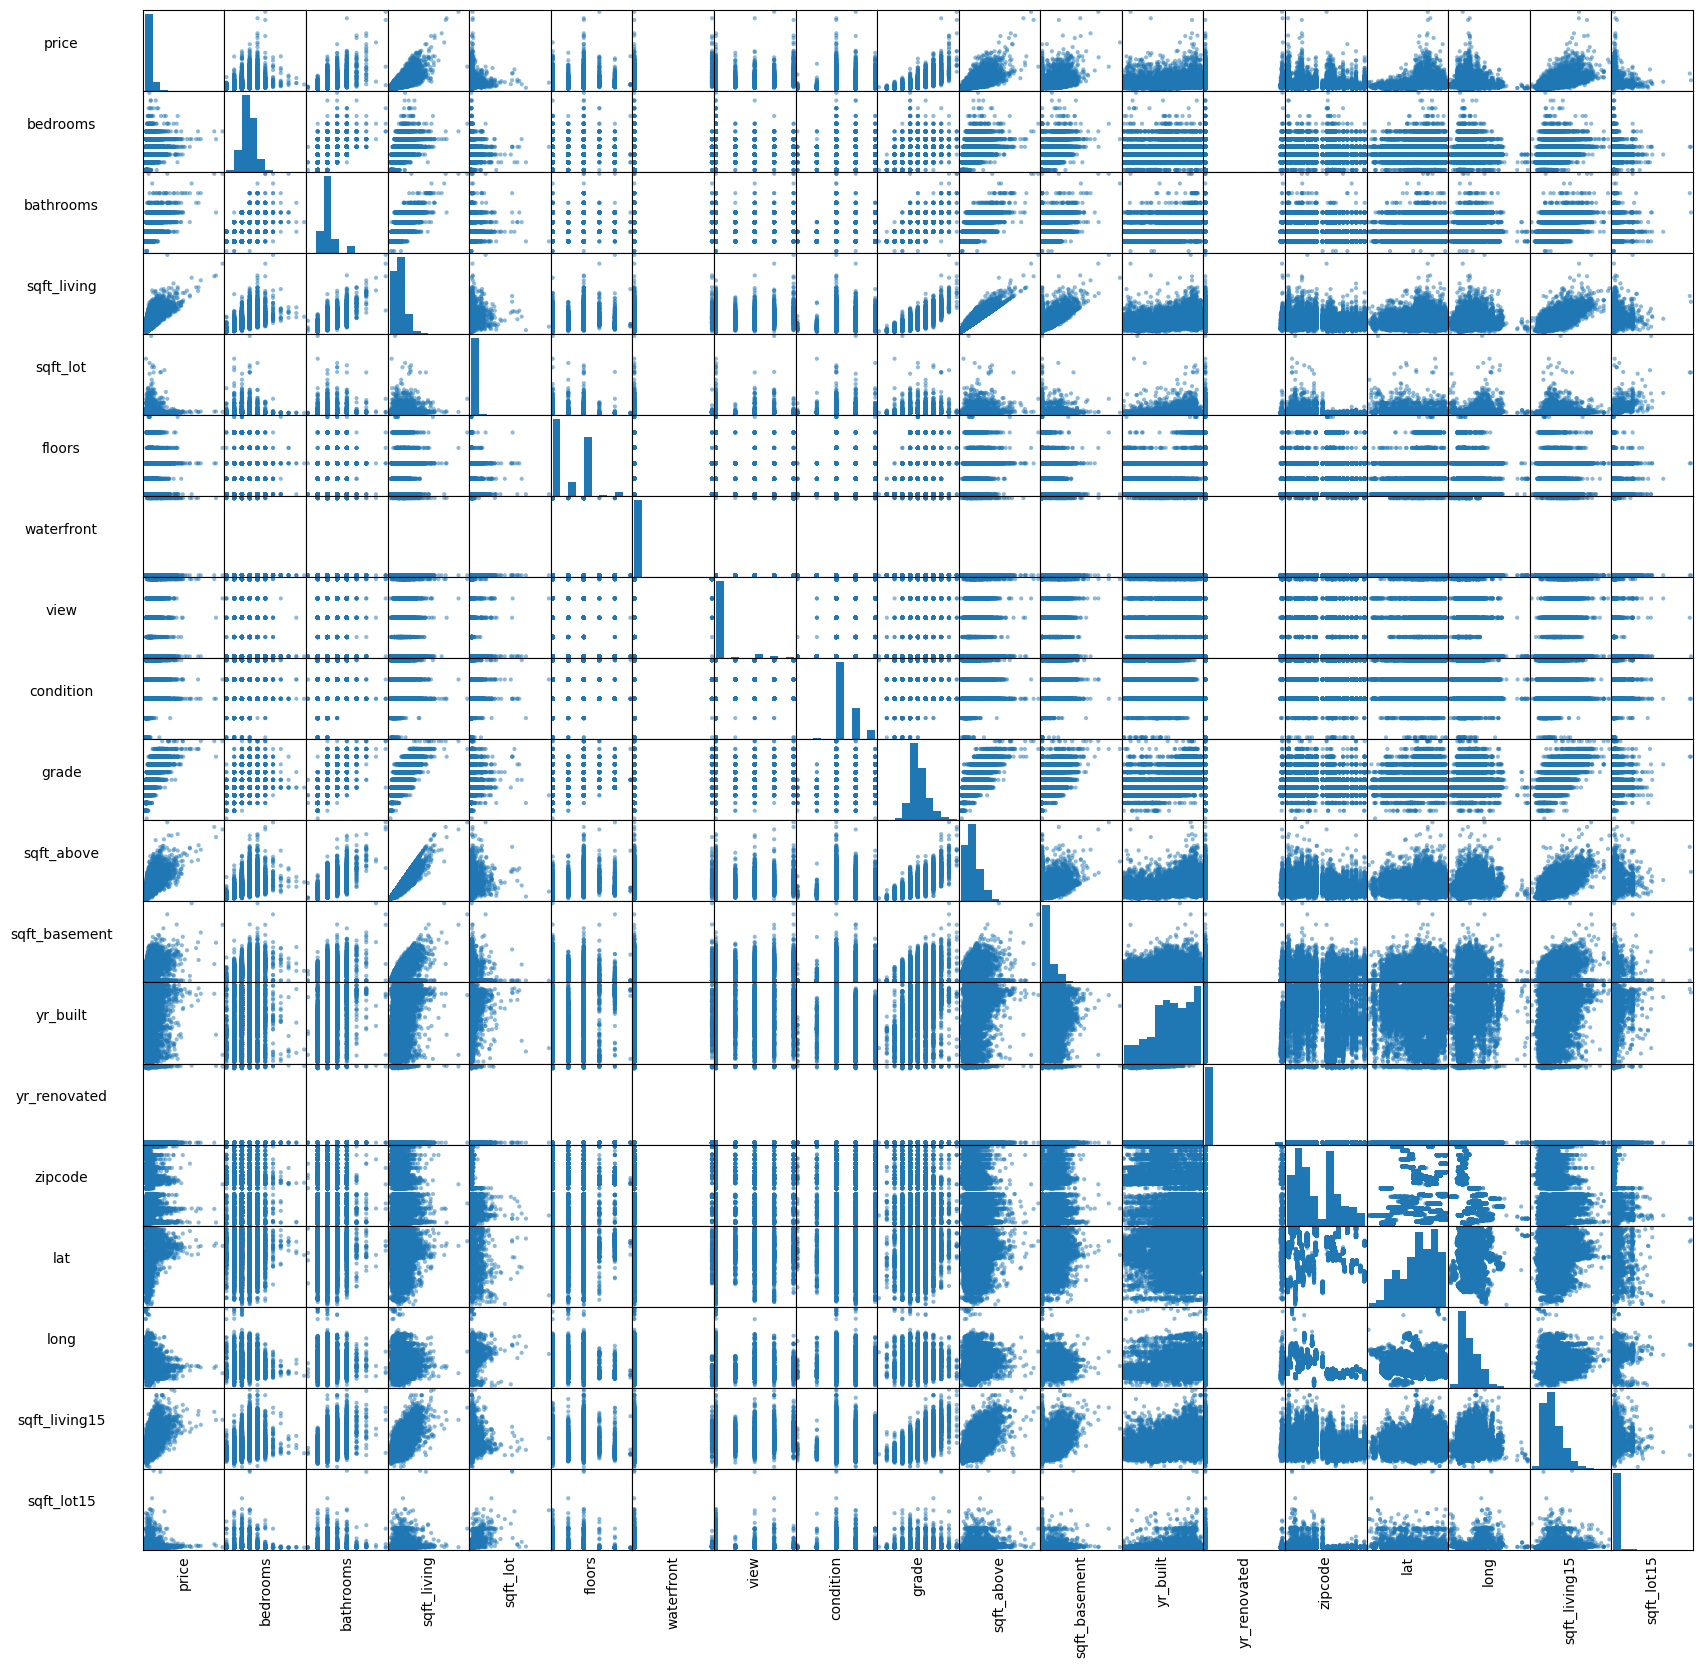

In [27]:
#scatter plot for dataset
sm = pd.plotting.scatter_matrix(data, figsize=[20, 20]);
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [28]:
data.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.315961   0.519630     0.701929  0.089879  0.256820   
bedrooms       0.315961  1.000000   0.500060     0.593178  0.033602  0.183707   
bathrooms      0.519630  0.500060   1.000000     0.702722  0.090531  0.368154   
sqft_living    0.701929  0.593178   0.702722     1.000000  0.173449  0.353941   
sqft_lot       0.089879  0.033602   0.090531     0.173449  1.000000 -0.004824   
floors         0.256820  0.183707   0.368154     0.353941 -0.004824  1.000000   
waterfront     0.264308 -0.002054   0.064619     0.104635  0.021458  0.020794   
view           0.393502  0.080741   0.201062     0.281710  0.075052  0.028401   
condition      0.036031  0.023440  -0.068033    -0.059397 -0.008806 -0.264013   
grade          0.667964  0.366174   0.591832     0.762776  0.114726  0.458783   
sqft_above     0.605392  0.492543   0.600467     0.876448  0.184134  0.523970   
sqft_basement  0.321103  0.303517   0.329024     0.428683  0.015038 -0.241845   
yr_built       0.053965  0.160736   0.378289     0.318140  0.052939  0.489175   
yr_renovated   0.117858  0.018626   0.062152     0.051056  0.004977  0.003785   
zipcode       -0.053409 -0.158588  -0.144936    -0.199793 -0.129582 -0.059522   
lat            0.306687 -0.011595   0.048894     0.052178 -0.085507  0.049280   
long           0.022047  0.136561   0.150938     0.241200  0.230222  0.125912   
sqft_living15  0.585267  0.404532   0.498541     0.756400  0.144756  0.280072   
sqft_lot15     0.082849  0.031892   0.087930     0.184337  0.718203 -0.010734   

               waterfront      view  condition     grade  sqft_above  \
price            0.264308  0.393502   0.036031  0.667964    0.605392   
bedrooms        -0.002054  0.080741   0.023440  0.366174    0.492543   
bathrooms        0.064619  0.201062  -0.068033  0.591832    0.600467   
sqft_living      0.104635  0.281710  -0.059397  0.762776    0.876448   
sqft_lot         0.021458  0.075052  -0.008806  0.114726    0.184134   
floors           0.020794  0.028401  -0.264013  0.458783    0.523970   
waterfront       1.000000  0.380543   0.016659  0.082817    0.071776   
view             0.380543  1.000000   0.045663  0.249077    0.166007   
condition        0.016659  0.045663   1.000000 -0.146854   -0.158826   
grade            0.082817  0.249077  -0.146854  1.000000    0.756069   
sqft_above       0.071776  0.166007  -0.158826  0.756069    1.000000   
sqft_basement    0.083053  0.270641   0.168431  0.165863   -0.051149   
yr_built        -0.024491 -0.054464  -0.361555  0.447854    0.424017   
yr_renovated     0.073938  0.090337  -0.055795  0.015618    0.020637   
zipcode          0.028925  0.085066   0.002835 -0.185761   -0.261557   
lat             -0.012154  0.006334  -0.015209  0.113602   -0.001160   
long            -0.037632 -0.077715  -0.105800  0.200324    0.344819   
sqft_living15    0.083822  0.278921  -0.092979  0.713863    0.731756   
sqft_lot15       0.030657  0.073079  -0.003093  0.120974    0.195069   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.321103  0.053965      0.117858 -0.053409  0.306687   
bedrooms            0.303517  0.160736      0.018626 -0.158588 -0.011595   
bathrooms           0.329024  0.378289      0.062152 -0.144936  0.048894   
sqft_living         0.428683  0.318140      0.051056 -0.199793  0.052178   
sqft_lot            0.015038  0.052939      0.004977 -0.129582 -0.085507   
floors             -0.241845  0.489175      0.003785 -0.059522  0.049280   
waterfront          0.083053 -0.024491      0.073938  0.028925 -0.012154   
view                0.270641 -0.054464      0.090337  0.085066  0.006334   
condition           0.168431 -0.361555     -0.055795  0.002835 -0.015209   
grade               0.165863  0.447854      0.015618 -0.185761  0.113602   
sqft_above         -0.051149  0.424017      0.020637 -0.261557 -0.001160   
sqft_basement       1.000000 -0.130063      

In [29]:
abs(data.corr()>0.75)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False     False   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False  False       False          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False  False       False          False   
sqft_living         False  False      False   True        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False       False          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True        True          False   
sqft_above          False  False      False   True        True          False   
sqft_basement       False  False      False  False       False           True   
yr_built            False  False      False  False       False          False   
yr_renovated        False  False      False  False       False          False   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False  False       False          False   
sqft_lot15          False  False      False  False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         False    False  False  False          False   
sqft

<Axes: >

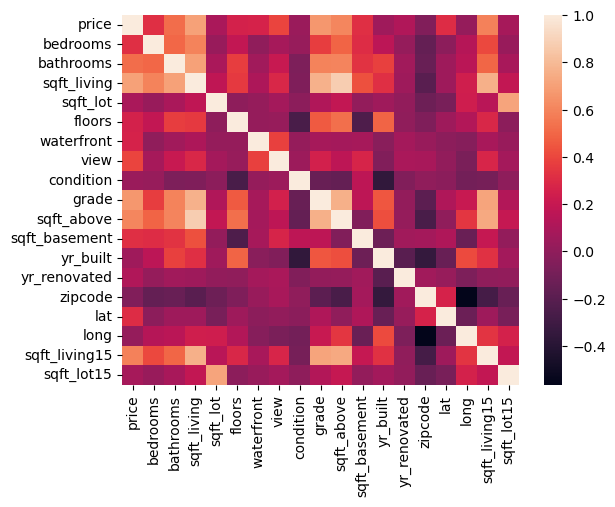

In [30]:
sns.heatmap(data.corr())

In [31]:
#check correlation is more than 75
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [32]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                 
(sqft_above, sqft_living)     0.876448
(sqft_living, grade)          0.762776
(sqft_living15, sqft_living)  0.756400
(grade, sqft_above)           0.756069

In [33]:
#now we can see sqft_above, sqft_living, grade, sqft_living15, bathrooms are highlly correlated to each other.
#sqft_living is correaled to each column.
#so we can drop sqrt_living and grade columns from our dataset.
data.drop(['sqft_living'] , axis = 1, inplace= True)

In [34]:
data.drop(['grade'] , axis = 1, inplace= True)

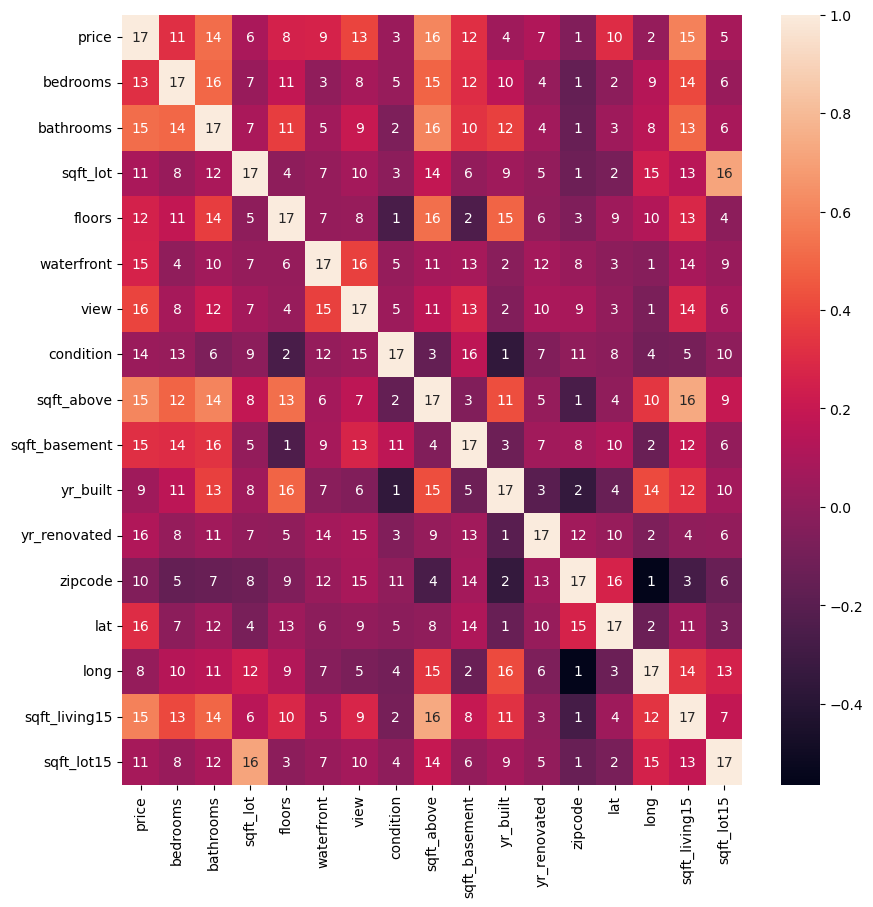

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=data.corr().rank(axis="columns"))
plt.show()

### step5: explore some relationships with data
###### check relationship with date

In [36]:
#convert date to month and drop date from our dataset
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [37]:
data.drop(['date'], axis =1 , inplace= True)

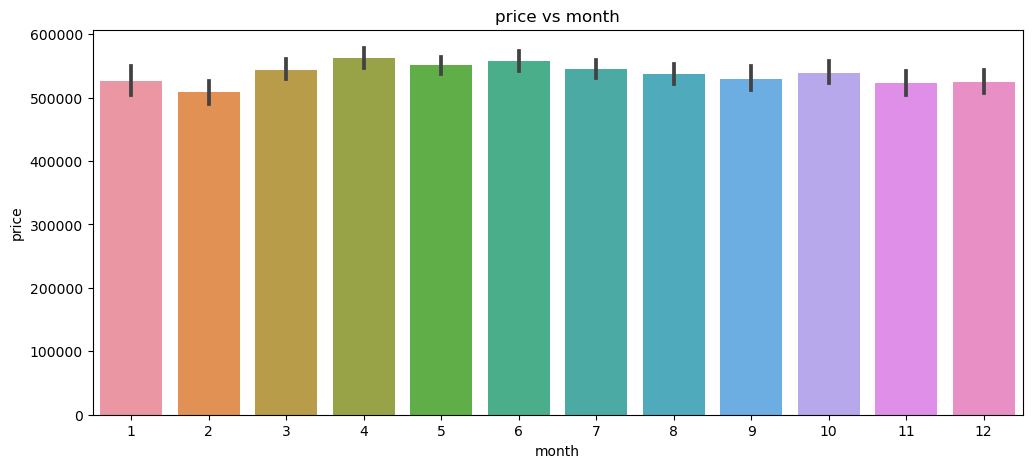

In [38]:
plt.figure(figsize = (12,5))
sns.barplot(data, x="month", y="price")
plt.title("price vs month")
plt.show()

###### check relationship with zipcode

In [39]:
data.zipcode.value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [40]:
data_zipcode = data.groupby('zipcode').aggregate(np.mean)
data_zipcode.reset_index(inplace = True)
data_zipcode.head()

zipcode         price  bedrooms  bathrooms      sqft_lot    floors  \
0    98001  2.811949e+05  3.393352   1.919668  14967.002770  1.430748   
1    98002  2.342840e+05  3.326633   1.854271   7517.633166  1.334171   
2    98003  2.941113e+05  3.357143   1.967857  10603.096429  1.310714   
3    98004  1.356524e+06  3.854890   2.542587  13104.220820  1.432177   
4    98005  8.102897e+05  3.851190   2.333333  19928.785714  1.279762   

   waterfront      view  condition   sqft_above  sqft_basement     yr_built  \
0    0.000000  0.094183   3.335180  1723.756233     180.027701  1980.867036   
1    0.000000  0.010050   3.743719  1522.537688     105.206030  1967.773869   
2    0.000000  0.214286   3.371429  1663.550000     259.117857  1976.885714   
3    0.003155  0.305994   3.495268  2419.842271     489.179811  1971.470032   
4    0.000000  0.095238   3.696429  2160.196429     485.952381  1969.744048   

   yr_renovated        lat        long  sqft_living15    sqft_lot15     month  
0     22.058172  47.309106 -122.270704    1830.099723  11218.875346  6.567867  
1     49.924623  47.308780 -122.213357    1479.030151   7585.482412  6.698492  
2     14.264286  47.315741 -122.310054    1876.196429   9746.178571  6.621429  
3    176.671924  47.616183 -122.205189    2674.700315  12805.022082  6.353312  
4     47.630952  47.611532 -122.167268    2567.863095  18367.773810  6.922619

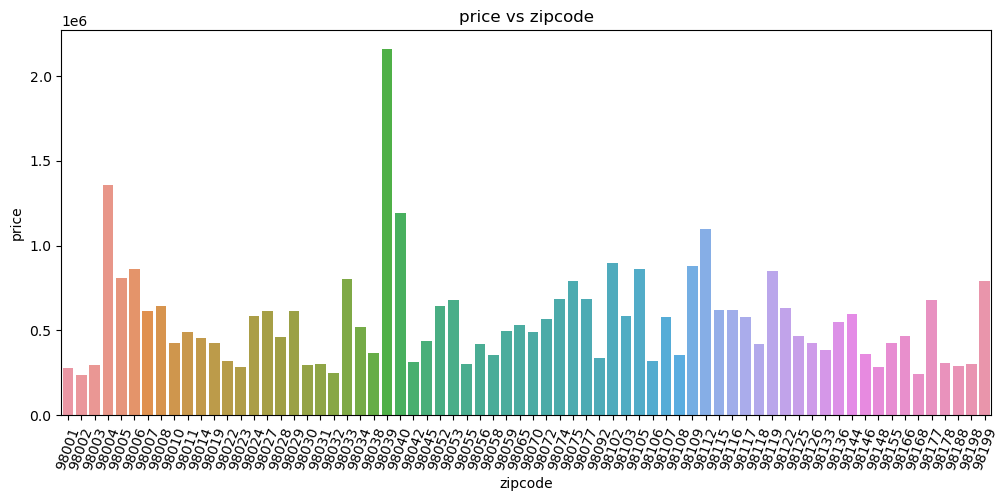

In [41]:
plt.figure(figsize = (12,5))
sns.barplot(data_zipcode, x="zipcode", y="price")
plt.xticks(rotation=70)
plt.title("price vs zipcode")
plt.show()

### step6: dealing with categorical variables

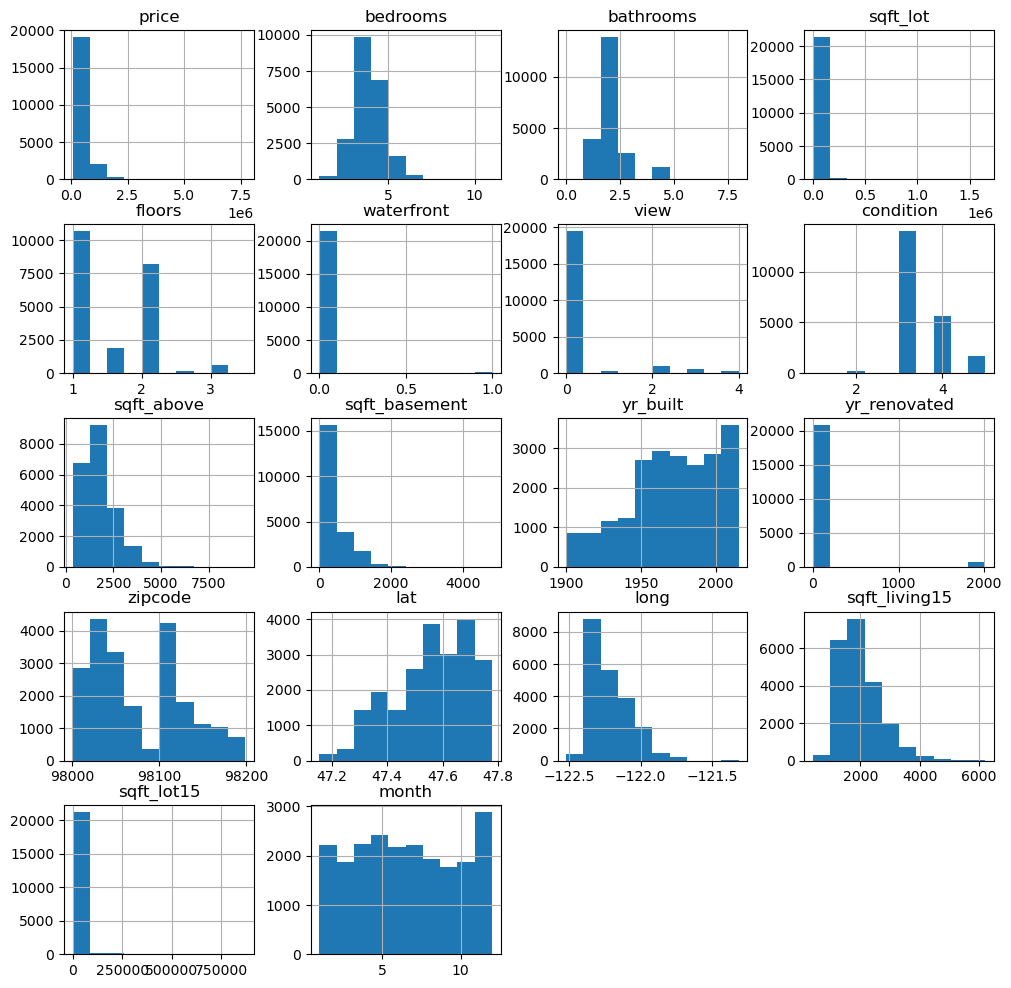

In [42]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax = ax);

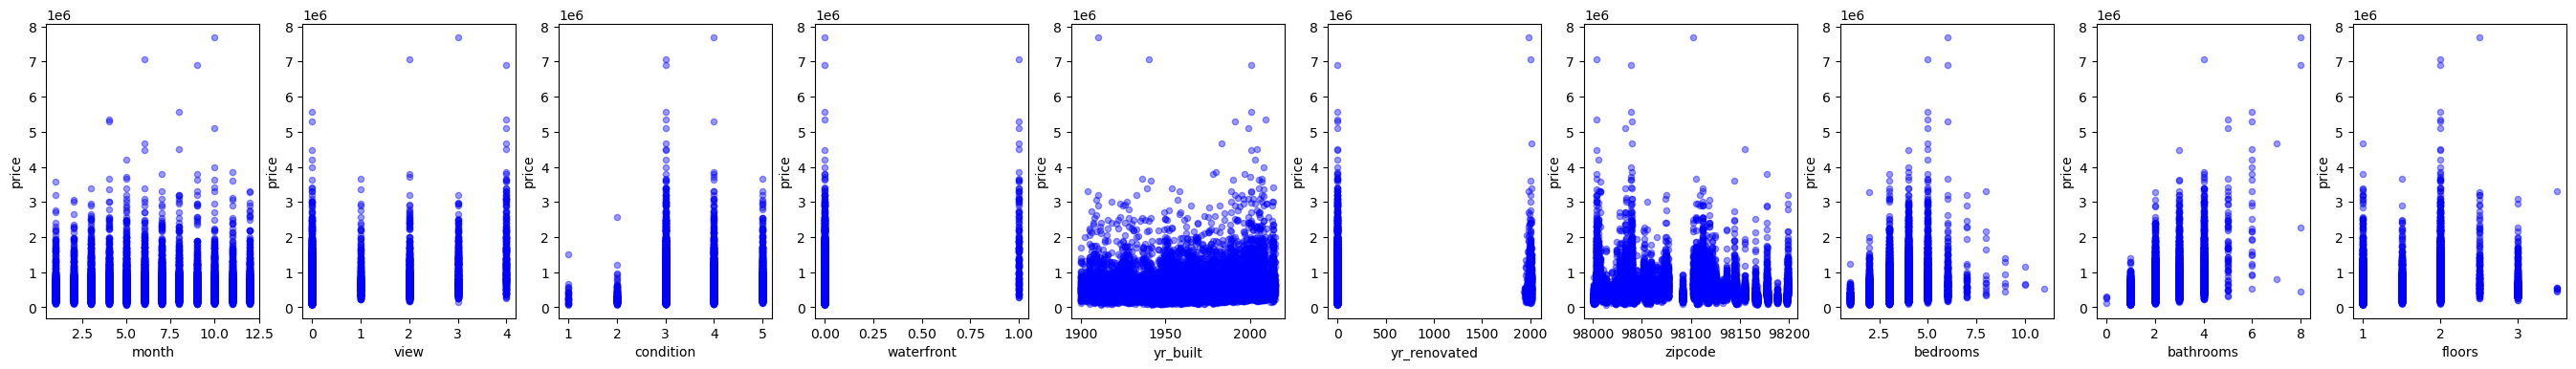

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(34,4))

for xcol, ax in zip([ 'month', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode' , 'bedrooms', 'bathrooms', 'floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [44]:
data[['month', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms', 'floors']].nunique()

month            12
view              5
condition         5
waterfront        2
yr_built        116
yr_renovated     70
zipcode          70
bedrooms         11
bathrooms         9
floors            6
dtype: int64

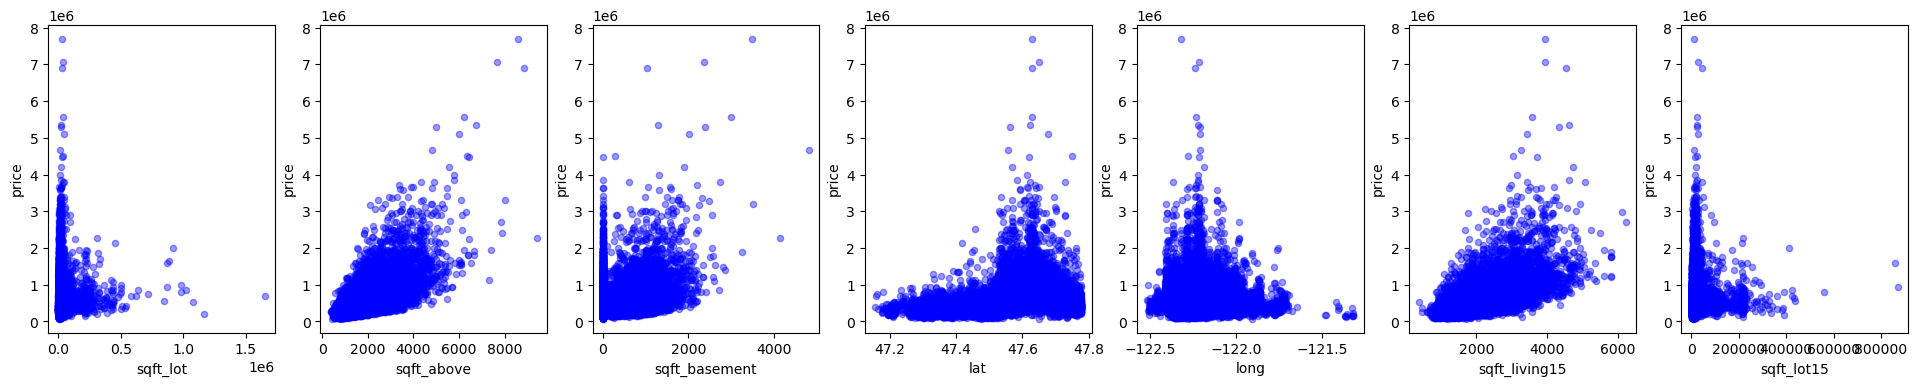

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24,4))

for xcol, ax in zip([ 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [46]:
categoricals= data[['month', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms', 'floors']]

### label encoding
###### change month int to category type

In [47]:
categoricals['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9], dtype=int64)

In [48]:
categoricals['month'] = categoricals['month'].replace(12,0)

In [49]:
bins = [0,3,6,9,11]
bins_date = pd.cut(categoricals['month'], bins, include_lowest=True, labels = ['winter', 'spring', 'summer', 'fall'])
bins_date = bins_date.cat.as_unordered()

<Axes: >

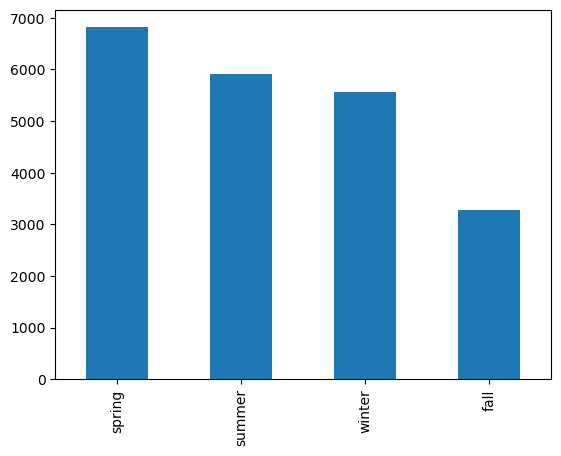

In [50]:
bins_date.value_counts().plot(kind = 'bar')

###### change view int to category type

In [51]:
categoricals['view'].unique()

array([0., 3., 4., 2., 1.])

In [52]:
categoricals['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [53]:
bins = [0,1,4]
bins_view = pd.cut(categoricals['view'], bins, include_lowest=True, labels = ['not_viewed', 'viewed'])
bins_view = bins_view.cat.as_unordered()

<Axes: >

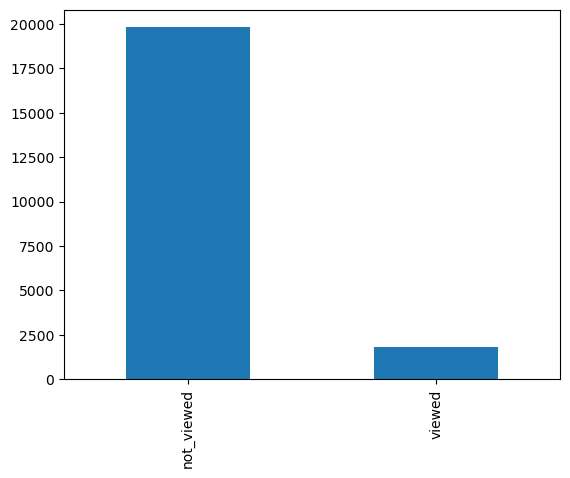

In [54]:
bins_view.value_counts().plot(kind = 'bar')

###### change yr_built int to category type

In [55]:
categoricals['yr_built'].describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [56]:
bins = [1900,1951,1975,1997,2015]
bins_yr_built = pd.cut(categoricals['yr_built'], bins, include_lowest=True, labels = ('1900_1950', '1951_1974', '1975_1996', '1997_2015'))
bins_yr_built = bins_yr_built.cat.as_unordered()

<Axes: >

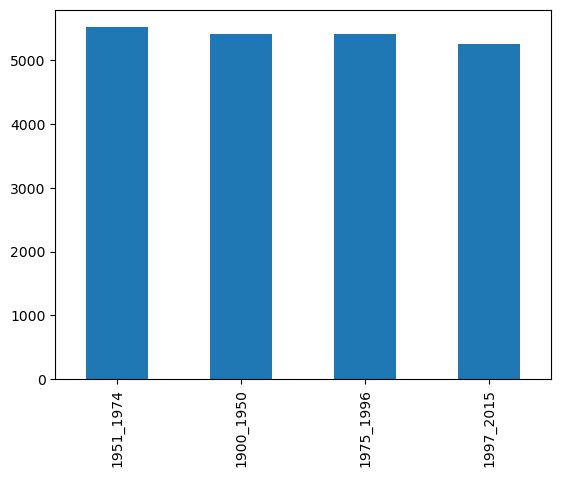

In [57]:
bins_yr_built.value_counts().plot(kind = 'bar')

###### change remaining columns into object

In [58]:
categoricals['condition'] = categoricals['condition'].astype('str')
categoricals['waterfront'] = categoricals['waterfront'].astype('int')
categoricals['zipcode'] = categoricals['zipcode'].astype('str')
categoricals['bedrooms'] = categoricals['bedrooms'].astype('str')
categoricals['yr_renovated'] = categoricals['yr_renovated'].astype('int')
categoricals['bathrooms'] = categoricals['bathrooms'].astype('int')
categoricals['floors'] = categoricals['floors'].astype('int')

In [59]:
categoricals['waterfront'] = categoricals['waterfront'].astype('str')
categoricals['yr_renovated'] = categoricals['yr_renovated'].astype('str')
categoricals['bathrooms'] = categoricals['bathrooms'].astype('str')
categoricals['floors'] = categoricals['floors'].astype('str')

In [60]:
categoricals = categoricals.drop(['view', 'month', 'yr_built'], axis= 1)
categoricals = pd.concat([categoricals,bins_date,bins_view,bins_yr_built] ,axis= 1)

In [61]:
categoricals

condition waterfront yr_renovated zipcode bedrooms bathrooms floors  \
0             3          0            0   98178        3         1      1   
1             3          0         1991   98125        3         2      2   
2             3          0            0   98028        2         1      1   
3             5          0            0   98136        4         3      1   
4             3          0            0   98074        3         2      1   
...         ...        ...          ...     ...      ...       ...    ...   
21592         3          0            0   98103        3         2      3   
21593         3          0            0   98146        4         2      2   
21594         3          0            0   98144        2         1      2   
21595         3          0            0   98027        3         2      2   
21596         3          0            0   98144        2         1      2   

        month        view   yr_built  
0        fall  not_viewed  1951_1974  
1      winter  not_viewed  1900_1950  
2      winter  not_viewed  1900_1950  
3      winter  not_viewed  1951_1974  
4      winter  not_viewed  1975_1996  
...       ...         ...        ...  
21592  spring  not_viewed  1997_2015  
21593  winter  not_viewed  1997_2015  
21594  spring  not_viewed  1997_2015  
21595  winter  not_viewed  1997_2015  
21596    fall  not_viewed  1997_2015  

[21596 rows x 10 columns]

In [62]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   condition     21596 non-null  object  
 1   waterfront    21596 non-null  object  
 2   yr_renovated  21596 non-null  object  
 3   zipcode       21596 non-null  object  
 4   bedrooms      21596 non-null  object  
 5   bathrooms     21596 non-null  object  
 6   floors        21596 non-null  object  
 7   month         21596 non-null  category
 8   view          21596 non-null  category
 9   yr_built      21596 non-null  category
dtypes: category(3), object(7)
memory usage: 1.4+ MB


In [63]:
condition_dummies = pd.get_dummies(categoricals['condition'], prefix='con', drop_first=True)
waterfront_dummies = pd.get_dummies(categoricals['waterfront'], prefix='wa', drop_first=True)
yr_renovated_dummies = pd.get_dummies(categoricals['yr_renovated'], prefix='yr_re', drop_first=True)
zipcode_dummies = pd.get_dummies(categoricals['zipcode'], prefix='zip', drop_first=True)
bedrooms_dummies = pd.get_dummies(categoricals['bedrooms'], prefix='bed', drop_first=True)
yr_built_dummies = pd.get_dummies(categoricals['yr_built'], prefix='yr_bu', drop_first=True)
month_dummies = pd.get_dummies(categoricals['month'], prefix='mon', drop_first=True)
view_dummies = pd.get_dummies(categoricals['view'], prefix='view', drop_first=True)
bathroom_dummies = pd.get_dummies(categoricals['bathrooms'], prefix='bath', drop_first=True)
floor_dummies = pd.get_dummies(categoricals['floors'], prefix='floor', drop_first=True)

In [64]:
df = pd.concat([condition_dummies ,waterfront_dummies,yr_renovated_dummies, zipcode_dummies,bedrooms_dummies,yr_built_dummies,month_dummies, view_dummies ,bathroom_dummies,floor_dummies],  axis=1)
df

con_2  con_3  con_4  con_5  wa_1  yr_re_1934  yr_re_1940  yr_re_1944  \
0          0      1      0      0     0           0           0           0   
1          0      1      0      0     0           0           0           0   
2          0      1      0      0     0           0           0           0   
3          0      0      0      1     0           0           0           0   
4          0      1      0      0     0           0           0           0   
...      ...    ...    ...    ...   ...         ...         ...         ...   
21592      0      1      0      0     0           0           0           0   
21593      0      1      0      0     0           0           0           0   
21594      0      1      0      0     0           0           0           0   
21595      0      1      0      0     0           0           0           0   
21596      0      1      0      0     0           0           0           0   

       yr_re_1945  yr_re_1946  ...  bath_1  bath_2  bath_3  bath_4  bath_5  \
0               0           0  ...       1       0       0       0       0   
1               0           0  ...       0       1       0       0       0   
2               0           0  ...       1       0       0       0       0   
3               0           0  ...       0       0       1       0       0   
4               0           0  ...       0       1       0       0       0   
...           ...         ...  ...     ...     ...     ...     ...     ...   
21592           0           0  ...       0       1       0       0       0   
21593           0           0  ...       0       1       0       0       0   
21594           0           0  ...       1       0       0       0       0   
21595           0           0  ...       0       1       0       0       0   
21596           0           0  ...       1       0       0       0       0   

       bath_6  bath_7  bath_8  floor_2  floor_3  
0           0       0       0        0        0  
1           0       0       0        1        0  
2           0       0       0        0        0  
3           0       0       0        0        0  
4           0       0       0        0        0  
...       ...     ...     ...      ...      ...  
21592       0       0       0        0        1  
21593       0       0       0        1        0  
21594       0       0       0        1        0  
21595       0       0       0        1        0  
21596       0       0       0        1        0  

[21596 rows x 170 columns]

In [65]:
#combined all data
df1 = data[['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [66]:
df1['sqft_basement'] = df1['sqft_basement'].astype('int')

### step7: modeling our data

In [67]:
#use ols regression model to get best fit line for numerical varables
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [68]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = df1.drop('price', axis= 1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4439.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:22:16   Log-Likelihood:            -2.9775e+05
No. Observations:               21596   AIC:                         5.955e+05
Df Residuals:                   21588   BIC:                         5.956e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.082e+07    1.6e+06    -50.449      0.000    -8.4e+07   -7.77e+07
sqft_lot          0.2992      0.056      5.357      0.000       0.190       0.409
sqft_above      241.2496      2.998     80.461      0.000     235.373     247.127
sqft_basement   221.1726      3.976     55.620      0.000     213.378     228.967
lat            6.625e+05   1.18e+04     56.239      0.000    6.39e+05    6.86e+05
long          -4.023e+05   1.28e+04    -31.325      0.000   -4.28e+05   -3.77e+05
sqft_living15    93.0327      3.738     24.889      0.000      85.706     100.359
sqft_lot15       -0.3038      0.085     -3.557      0.000      -0.471      -0.136
==============================================================================
Omnibus:                    17875.395   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1233529.623
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      39.340   Cond. No.                     5.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### here r_squared is 0.590 that means 59% of variations in dependent varable 'y' are explained by the independent variable in our model.
#### and skew and kurtosis are high 
##### so to get better r_squared value we need to do normalization to our numerical variables 

##### drow QQ-plot

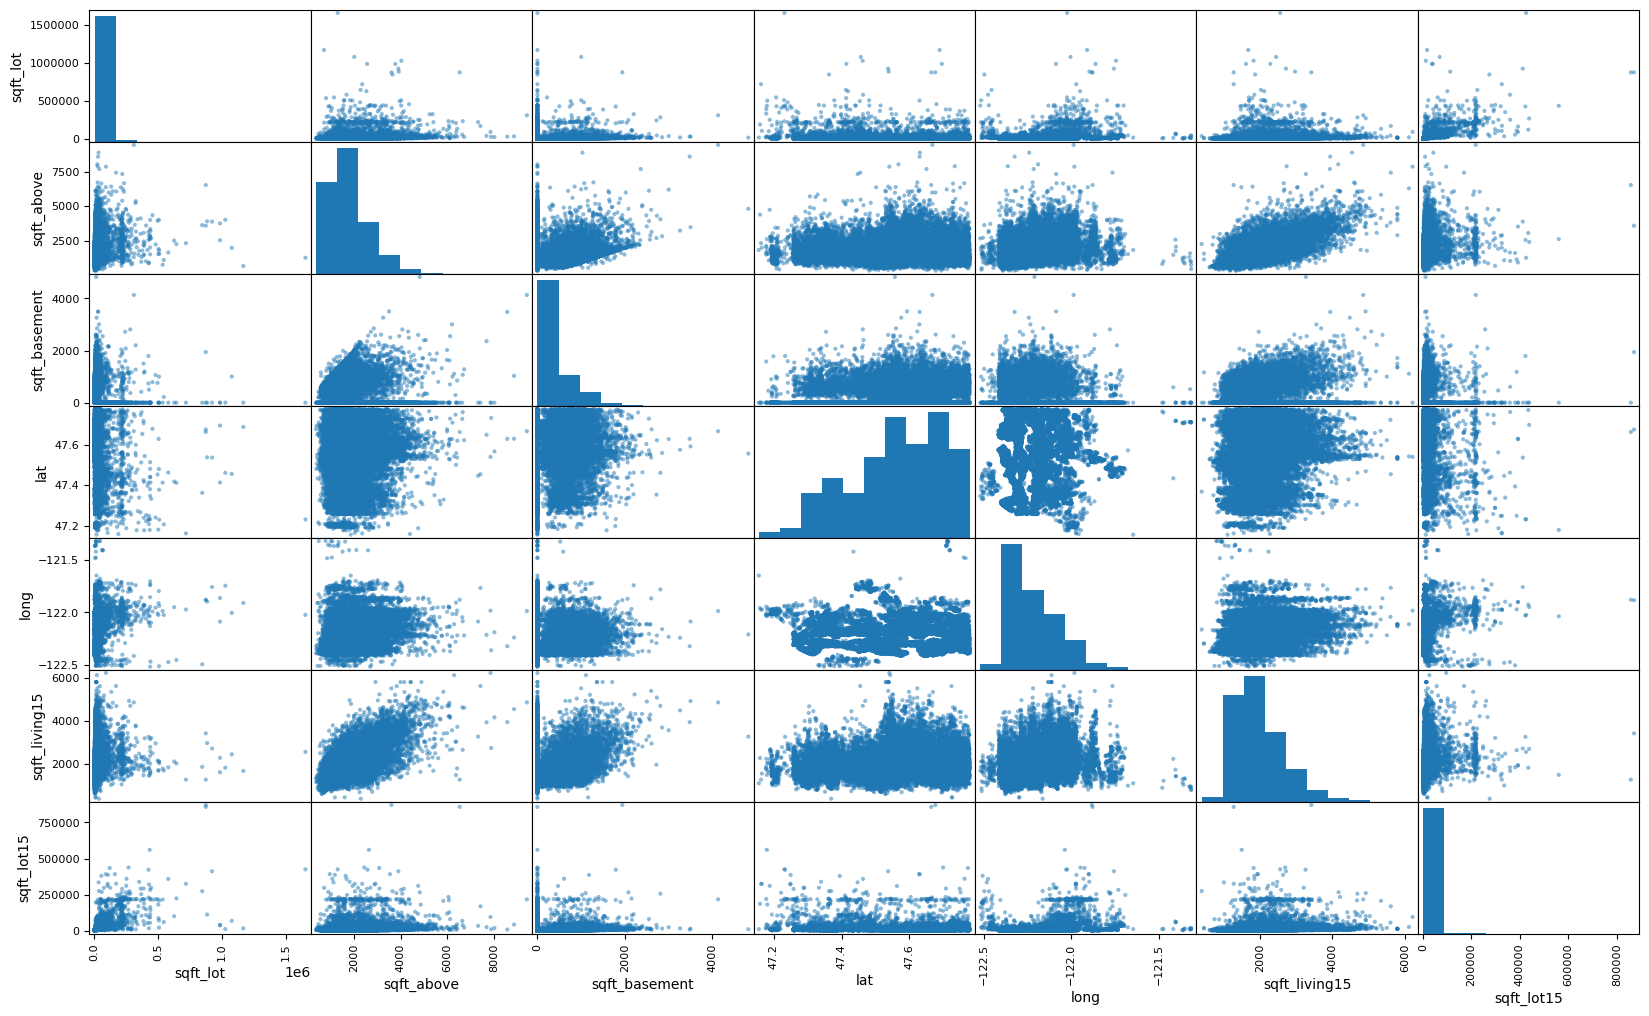

In [69]:
pd.plotting.scatter_matrix(x_cols, figsize=(20,12));

### step8 : combine catagorical data,  dependent data and independent data into one big data and modeling our data 

In [70]:
bigdata = pd.concat([df,df1] , axis = 1)

In [71]:
bigdata

con_2  con_3  con_4  con_5  wa_1  yr_re_1934  yr_re_1940  yr_re_1944  \
0          0      1      0      0     0           0           0           0   
1          0      1      0      0     0           0           0           0   
2          0      1      0      0     0           0           0           0   
3          0      0      0      1     0           0           0           0   
4          0      1      0      0     0           0           0           0   
...      ...    ...    ...    ...   ...         ...         ...         ...   
21592      0      1      0      0     0           0           0           0   
21593      0      1      0      0     0           0           0           0   
21594      0      1      0      0     0           0           0           0   
21595      0      1      0      0     0           0           0           0   
21596      0      1      0      0     0           0           0           0   

       yr_re_1945  yr_re_1946  ...  floor_2  floor_3     price  sqft_lot  \
0               0           0  ...        0        0  221900.0      5650   
1               0           0  ...        1        0  538000.0      7242   
2               0           0  ...        0        0  180000.0     10000   
3               0           0  ...        0        0  604000.0      5000   
4               0           0  ...        0        0  510000.0      8080   
...           ...         ...  ...      ...      ...       ...       ...   
21592           0           0  ...        0        1  360000.0      1131   
21593           0           0  ...        1        0  400000.0      5813   
21594           0           0  ...        1        0  402101.0      1350   
21595           0           0  ...        1        0  400000.0      2388   
21596           0           0  ...        1        0  325000.0      1076   

       sqft_above  sqft_basement      lat     long  sqft_living15  sqft_lot15  
0            1180              0  47.5112 -122.257           1340        5650  
1            2170            400  47.7210 -122.319           1690        7639  
2             770              0  47.7379 -122.233           2720        8062  
3            1050            910  47.5208 -122.393           1360        5000  
4            1680              0  47.6168 -122.045           1800        7503  
...           ...            ...      ...      ...            ...         ...  
21592        1530              0  47.6993 -122.346           1530        1509  
21593        2310              0  47.5107 -122.362           1830        7200  
21594        1020              0  47.5944 -122.299           1020        2007  
21595        1600              0  47.5345 -122.069           1410        1287  
21596        1020              0  47.5941 -122.299           1020        1357  

[21596 rows x 178 columns]

In [72]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = bigdata.drop('price', axis= 1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=bigdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     519.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:22:28   Log-Likelihood:            -2.8939e+05
No. Observations:               21596   AIC:                         5.791e+05
Df Residuals:                   21418   BIC:                         5.806e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.485e+07   6.14e+06     -5.674      0.000   -4.69e+07   -2.28e+07
con_2             1.01e+05   3.24e+04      3.118      0.002    3.75e+04    1.64e+05
con_3            1.084e+05   3.01e+04      3.607      0.000    4.95e+04    1.67e+05
con_4            1.353e+05   3.01e+04      4.496      0.000    7.63e+04    1.94e+05
con_5            1.841e+05   3.03e+04      6.080      0.000    1.25e+05    2.43e+05
wa_1             7.712e+05   1.43e+04     53.910      0.000    7.43e+05    7.99e+05
yr_re_1934       -6.06e+04   1.61e+05     -0.377      0.706   -3.76e+05    2.55e+05
yr_re_1940      -9.282e+04   1.14e+05     -0.817      0.414   -3.16e+05     1.3e+05
yr_re_1944      -7.645e+04   1.61e+05     -0.475      0.634   -3.92e+05    2.39e+05
yr_re_1945      -3.118e+04   9.28e+04     -0.336      0.737   -2.13e+05    1.51e+05
yr_re_1946       7.629e+04   1.61e+05      0.475      0.635   -2.38e+05    3.91e+05
yr_re_1948       3.738e+04   1.61e+05      0.232      0.817   -2.79e+05    3.53e+05
yr_re_1950       1647.5562   1.61e+05      0.010      0.992   -3.14e+05    3.18e+05
yr_re_1951       1.012e+05   1.61e+05      0.629      0.529   -2.14e+05    4.16e+05
yr_re_1953      -1.855e+05   1.61e+05     -1.154      0.248   -5.01e+05     1.3e+05
yr_re_1954        3.24e+05   1.61e+05      2.017      0.044    9094.121    6.39e+05
yr_re_1955       2.851e+04   9.28e+04      0.307      0.759   -1.53e+05     2.1e+05
yr_re_1956      -2.984e+05   9.32e+04     -3.203      0.001   -4.81e+05   -1.16e+05
yr_re_1957      -5.489e+04   1.14e+05     -0.483      0.629   -2.78e+05    1.68e+05
yr_re_1958      -8.328e+04   9.29e+04     -0.897      0.370   -2.65e+05    9.88e+04
yr_re_1959      -1.646e+05   1.61e+05     -1.025      0.305   -4.79e+05     1.5e+05
yr_re_1960      -9.645e+04    9.3e+04     -1.037      0.300   -2.79e+05    8.58e+04
yr_re_1962      -1.136e+05   1.14e+05     -0.999      0.318   -3.37e+05    1.09e+05
yr_re_1963       -2.23e+05   8.05e+04     -2.769      0.006   -3.81e+05   -6.51e+04
yr_re_1964      -2.552e+04    7.2e+04     -0.355      0.723   -1.67e+05    1.16e+05
yr_re_1965       6.358e+04   8.05e+04      0.790      0.430   -9.42e+04    2.21e+05
yr_re_1967       -3.49e+04   1.14e+05     -0.307      0.759   -2.58e+05    1.88e+05
yr_re_1968      -1.546e+04   6.08e+04     -0.254      0.799   -1.35e+05    1.04e+05
yr_re_1969      -9.758e+04   8.04e+04     -1.214      0.225   -2.55e+05       6e+04
yr_re_1970      -1.584e+05   5.37e+04     -2.953      0.003   -2.64e+05   -5.33e+04
yr_re_1971      -7.057e+04   1.61e+05     -0.439      0.661   -3.86e+05    2.44e+05
yr_re_1972      -1.187e+05   9.32e+04     -1.273      0.203   -3.01e+05     6.4e+04
yr_re_1973      -6.661e+04   8.04e+04     -0.829      0.407   -2.24e+05    9.09e+04
yr_re_1974       1.745e+04   1.14e+05      0.153      0.878

##### here r_squared is 0.810 that means 81% of variations in dependent varable 'y' are explained by the independent variable in our model.
##### so to get better r_squared value and better p-values we need to do normalization to our numerical variables

### step9: log transform and feature scalling:


In [73]:
log_names = [f'{column}_log' for column in df1.columns]
house_log = np.log(df1)
house_log.columns = log_names
def normalize(feature):
    return (feature- feature.mean())/feature.std()
house_log_norm = house_log.apply(normalize)

In [74]:
house_log_norm

price_log  sqft_lot_log  sqft_above_log  sqft_basement_log   lat_log  \
0      -1.401949     -0.388437       -0.753616                NaN -0.351315   
1       0.279963     -0.113253        0.672646                NaN  1.160056   
2      -1.799376      0.244455       -1.753007                NaN  1.281512   
3       0.499719     -0.523918       -1.026886                NaN -0.282012   
4       0.178459      0.008124        0.073466                NaN  0.410246   
...          ...           ...             ...                ...       ...   
21592  -0.483013     -2.171564       -0.145493                NaN  1.004041   
21593  -0.282922     -0.356909        0.819016                NaN -0.354925   
21594  -0.272973     -1.975352       -1.094750                NaN  0.248844   
21595  -0.282922     -1.343101       -0.040759                NaN -0.183135   
21596  -0.677252     -2.226826       -1.094750                NaN  0.246682   

       long_log  sqft_living15_log  sqft_lot15_log  
0           NaN          -1.035481       -0.395473  
1           NaN          -0.326831       -0.024316  
2           NaN           1.126459        0.042006  
3           NaN          -0.990239       -0.545872  
4           NaN          -0.134267       -0.046422  
...         ...                ...             ...  
21592       NaN          -0.630559       -2.020096  
21593       NaN          -0.083791       -0.097149  
21594       NaN          -1.868748       -1.669142  
21595       NaN          -0.879984       -2.215923  
21596       NaN          -1.868748       -2.150748  

[21596 rows x 8 columns]

array([[<Axes: title={'center': 'price_log'}>,
        <Axes: title={'center': 'sqft_lot_log'}>,
        <Axes: title={'center': 'sqft_above_log'}>],
       [<Axes: title={'center': 'sqft_basement_log'}>,
        <Axes: title={'center': 'lat_log'}>,
        <Axes: title={'center': 'long_log'}>],
       [<Axes: title={'center': 'sqft_living15_log'}>,
        <Axes: title={'center': 'sqft_lot15_log'}>, <Axes: >]],
      dtype=object)

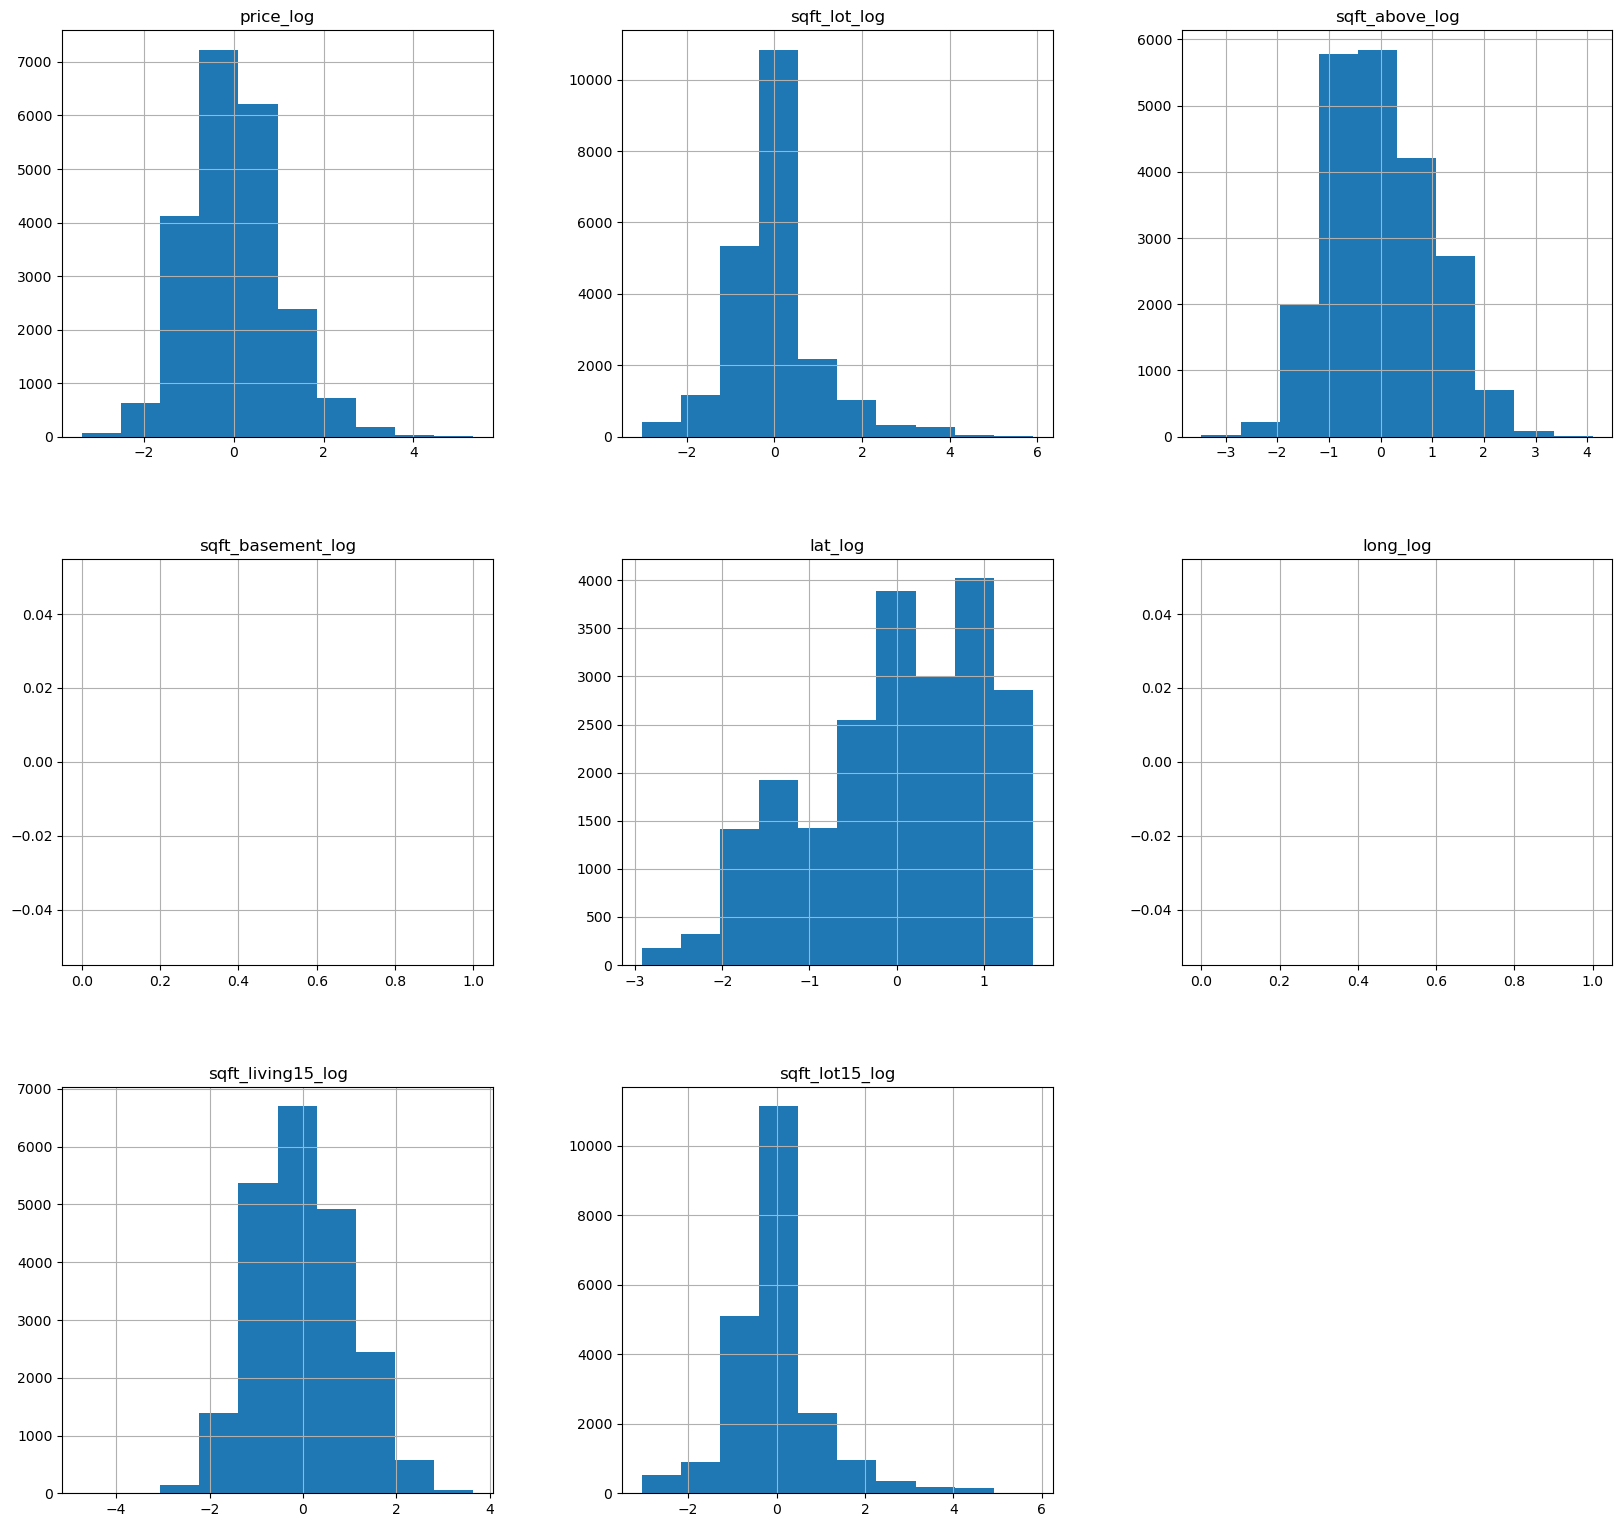

In [75]:
house_log_norm.hist(figsize=(20,19))

In [76]:
house_log_norm= house_log_norm.drop(['sqft_basement_log', 'long_log'] , axis=1)

In [77]:
from statsmodels.formula.api import ols
outcome = 'price_log'
x_cols = house_log_norm.drop('price_log', axis= 1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_log_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     6829.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:22:30   Log-Likelihood:                -20403.
No. Observations:               21596   AIC:                         4.082e+04
Df Residuals:                   21590   BIC:                         4.087e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          9.225e-15      0.004   2.18e-12      1.000      -0.008       0.008
sqft_lot_log          0.0586      0.011      5.417      0.000       0.037       0.080
sqft_above_log        0.3557      0.006     58.347      0.000       0.344       0.368
lat_log               0.4340      0.004    100.525      0.000       0.426       0.442
sqft_living15_log     0.3528      0.006     56.245      0.000       0.341       0.365
sqft_lot15_log       -0.1057      0.011     -9.769      0.000      -0.127      -0.085
==============================================================================
Omnibus:                      693.085   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.383
Skew:                           0.368   Prob(JB):                    3.72e-195
Kurtosis:                       3.673   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1. here after normalization and log trasform our r_squared is 0.613 that means 61.3% of variations in dependent varable 'y' are explained by the independent variable in our model.
### 2. our skewness is fall in between -3 to +3
### 3. kurtosis is in range between -10 to +10
### 4. p-value is less than 0.05 to all the columns that means there is no relationship between the variables.

###### KDE plots 

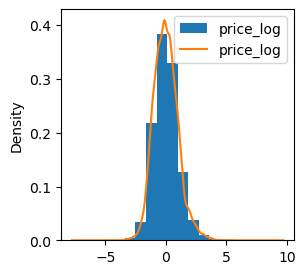

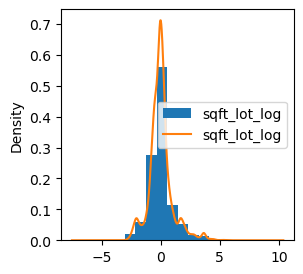

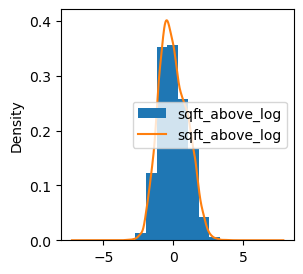

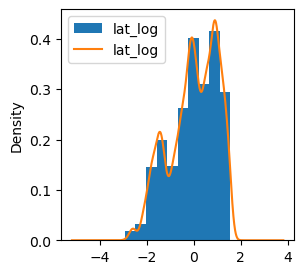

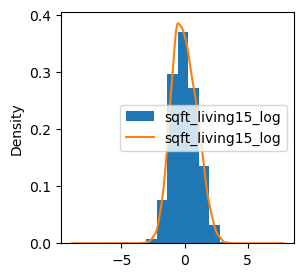

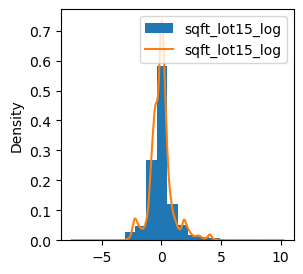

In [78]:
headers = list(house_log_norm)
for column in headers:
    house_log_norm[column].plot.hist(density = True , figsize = (3,3))
    house_log_norm[column].plot.kde(label = column , figsize = (3,3))
    plt.legend()
    plt.show()
    

###### mean normalization:

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

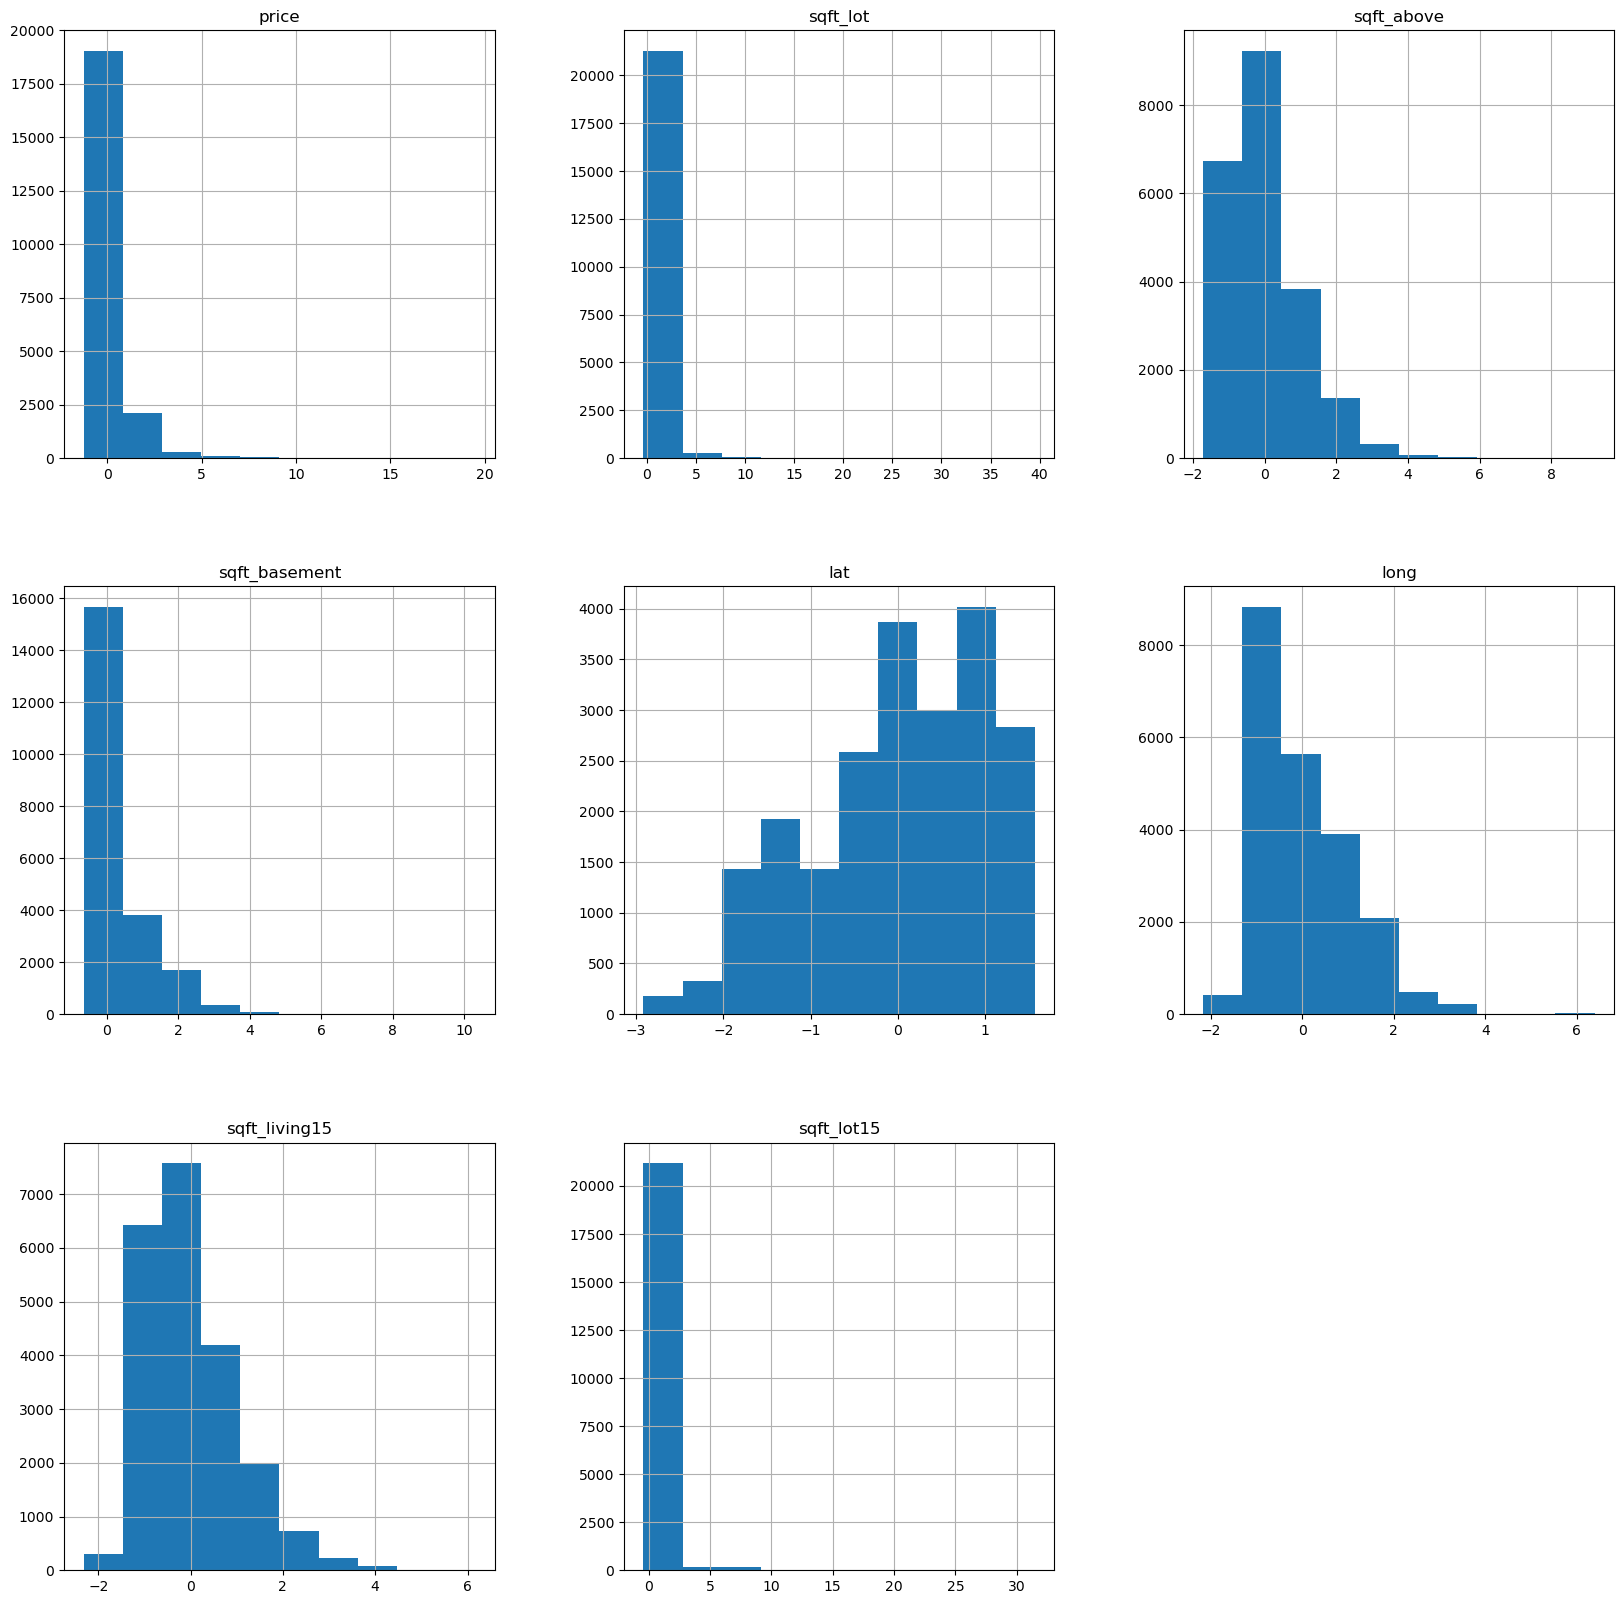

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_stdscaler = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
df_stdscaler.hist(figsize=(20,20))

### step10 : create a model for total data set

In [80]:
bb = pd.concat([house_log_norm,df], axis = 1)

In [81]:
from statsmodels.formula.api import ols
outcome = 'price_log'
x_cols = bb.drop('price_log', axis= 1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=bb).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     777.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:22:43   Log-Likelihood:                -9105.0
No. Observations:               21596   AIC:                         1.856e+04
Df Residuals:                   21420   BIC:                         1.997e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9599      0.203     -9.649      0.000      -2.358      -1.562
sqft_lot_log          0.1564      0.007     23.107      0.000       0.143       0.170
sqft_above_log        0.3328      0.005     64.759      0.000       0.323       0.343
lat_log               0.1717      0.020      8.470      0.000       0.132       0.211
sqft_living15_log     0.1905      0.004     44.847      0.000       0.182       0.199
sqft_lot15_log       -0.0207      0.007     -3.081      0.002      -0.034      -0.008
con_2                 0.4485      0.075      5.997      0.000       0.302       0.595
con_3                 0.7537      0.069     10.852      0.000       0.618       0.890
con_4                 0.8590      0.070     12.357      0.000       0.723       0.995
con_5                 1.0052      0.070     14.369      0.000       0.868       1.142
wa_1                  1.1561      0.033     35.057      0.000       1.091       1.221
yr_re_1934            0.1193      0.371      0.321      0.748      -0.609       0.847
yr_re_1940           -0.1932      0.262     -0.736      0.462      -0.707       0.321
yr_re_1944           -0.3758      0.371     -1.012      0.311      -1.103       0.352
yr_re_1945           -0.0523      0.214     -0.244      0.807      -0.473       0.368
yr_re_1946            0.4486      0.371      1.210      0.226      -0.278       1.175
yr_re_1948            0.0107      0.372      0.029      0.977      -0.719       0.740
yr_re_1950           -0.2973      0.372     -0.799      0.425      -1.027       0.432
yr_re_1951            0.2099      0.371      0.565      0.572      -0.518       0.937
yr_re_1953           -0.7465      0.371     -2.011      0.044      -1.474      -0.019
yr_re_1954            0.8773      0.371      2.364      0.018       0.150       1.605
yr_re_1955            0.2381      0.214      1.111      0.266      -0.182       0.658
yr_re_1956           -0.4729      0.215     -2.198      0.028      -0.895      -0.051
yr_re_1957            0.0668      0.262      0.254      0.799      -0.448       0.581
yr_re_1958           -0.1451      0.214     -0.677      0.499      -0.565       0.275
yr_re_1959           -0.4751      0.371     -1.281      0.200      -1.202       0.252
yr_re_1960           -0.7508      0.215     -3.497      0.000      -1.172      -0.330
yr_re_1962           -0.0524      0.263     -0.199      0.842      -0.567       0.462
yr_re_1963           -0.7218      0.186     -3.883      0.000      -1.086      -0.357
yr_re_1964            0.1016      0.166      0.611      0.541      -0.224       0.427
yr_re_1965            0.0992      0.186      0.534      0.594      -0.265       0.464
yr_re_1967           -0.1323      0.263     -0.504      0.614      -0.647       0.382
yr_re_1968           -0.2781      0.140     -1.981      0.048      -0.553

### 1. here after normalization and log trasform our r_squared is 0.864 that means 86% of variations in dependent varable 'y' are explained by the independent variable in our model.
### 2. our skewness is fall in between -3 to +3
### 3. kurtosis is in range between -10 to +10
### 4. p-value is less than 0.05 to some of  the columns that means there is no relationship between the variables.

## see the relationship of numerical data with price
##### joint plots

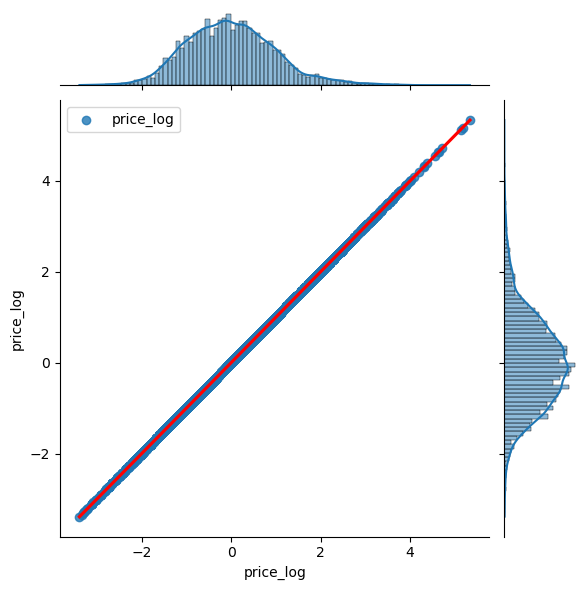

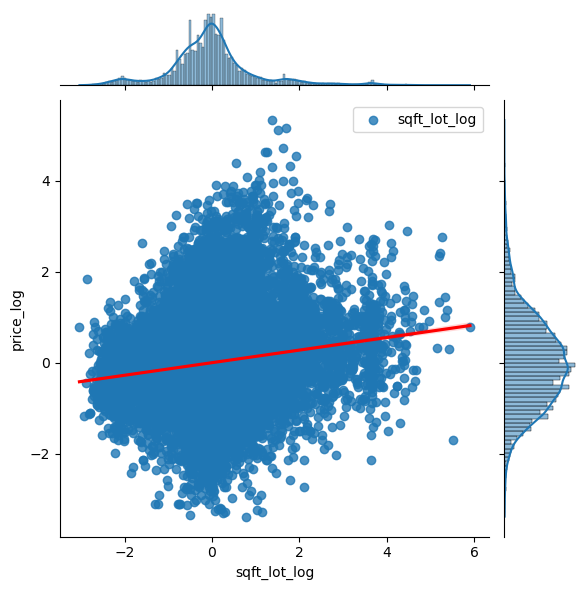

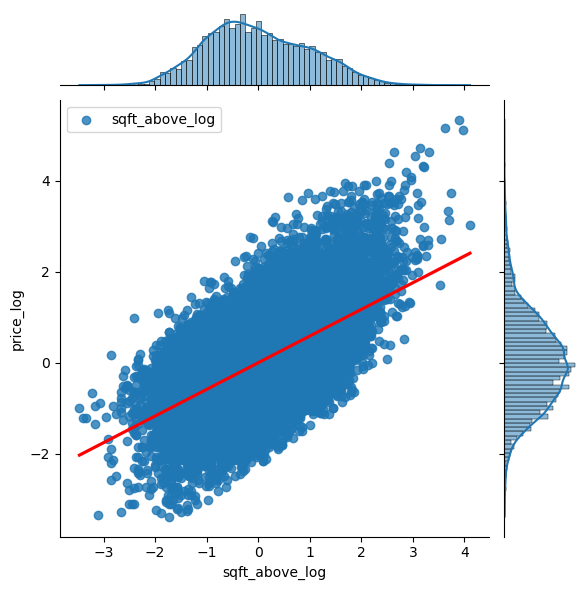

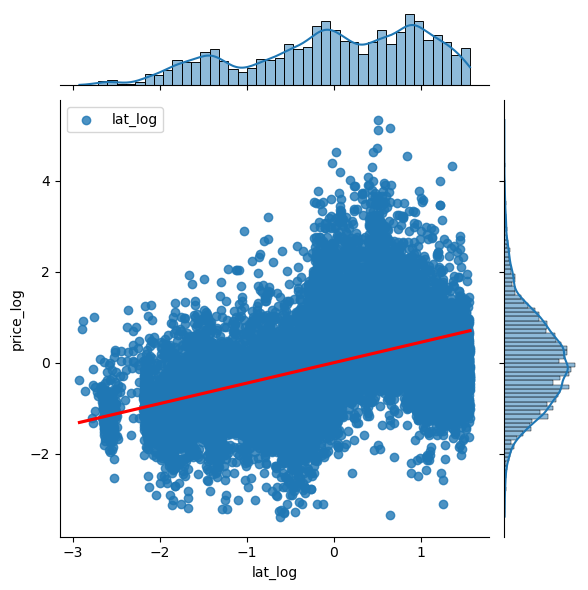

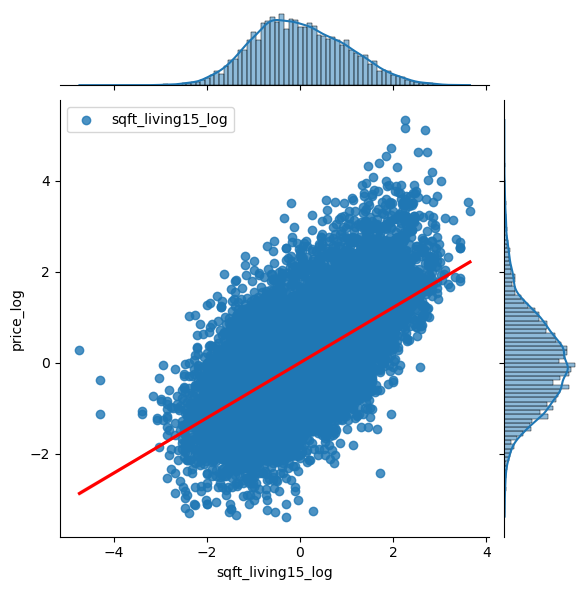

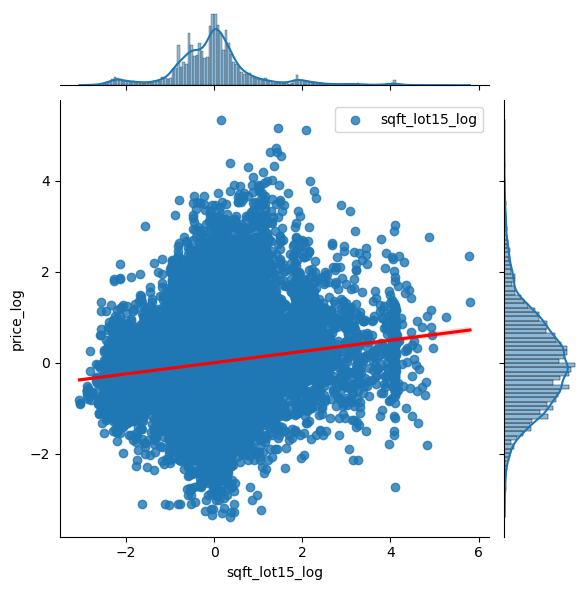

In [82]:
for column in headers:
    sns.jointplot(x = column, y = "price_log" , data = house_log_norm, kind = 'reg', label = column,
                  joint_kws = {'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()
    

### step 11: feature ranking with recursive feature elimination(RFE)

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [84]:
X = bb.drop(['price_log'] , axis = 1)
y = bb['price_log']

In [85]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const                 5.481243e-22
sqft_lot_log         1.056284e-116
sqft_above_log        0.000000e+00
lat_log               2.601334e-17
sqft_living15_log     0.000000e+00
                         ...      
bath_6                1.679292e-09
bath_7                4.043132e-02
bath_8                1.152285e-05
floor_2               1.270316e-23
floor_3               7.270707e-35
Length: 176, dtype: float64

In [86]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X,y.values.ravel())
print(selector.support_ )
print(selector.ranking_)

[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [87]:
r_squ_list = []
adj_r_squ_list = []
list_n = list(range(5,65,10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns], y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)** 2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
    print(r_squared)
    print(adjusted_r_squared)
r_squ_list.append(r_squared)
adj_r_squ_list.append(adjusted_r_squared)

0.1020532252508779
0.10184527092601703
0.25046358156761583
0.24994258776425693
0.41780144180389256
0.41712666368822715
0.4892345097820774
0.48840534502523014
0.7235852480648912
0.7230080478868365
0.7340543536315542
0.7333752909319133


#### 1. there is not much difference between r-squared and adj-rsquared values. 
#### 2. our r-squared value is getting higher as we add more features.
#### 3. we can test this using test-train split 

### step12 : test- train split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = bb.drop(['price_log'] , axis = 1)
y = bb['price_log']

In [95]:
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.2)

In [96]:
def model(X_train, X_test, y_train, y_test):
    features = X_train.copy()
    features['price_log'] = y_train  
    formula = 'price_log~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))
    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    display(model.summary())
    return model

In [97]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.8633786546543059
Test R2:  -5.655184317206431e+21
Train RMSE:  0.36901271179932854
Test RMSE:  75674356584.19691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     630.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:25:49   Log-Likelihood:                -7261.8
No. Observations:               17276   AIC:                         1.487e+04
Df Residuals:                   17103   BIC:                         1.621e+04
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3657      0.235     -5.817      0.000      -1.826      -0.906
sqft_lot_log          0.1544      0.008     20.458      0.000       0.140       0.169
sqft_above_log        0.3325      0.006     57.829      0.000       0.321       0.344
lat_log               0.1604      0.023      7.085      0.000       0.116       0.205
sqft_living15_log     0.1834      0.005     38.728      0.000       0.174       0.193
sqft_lot15_log       -0.0169      0.008     -2.257      0.024      -0.032      -0.002
con_2                 0.3345      0.090      3.736      0.000       0.159       0.510
con_3                 0.6062      0.084      7.216      0.000       0.442       0.771
con_4                 0.7072      0.084      8.411      0.000       0.542       0.872
con_5                 0.8493      0.085     10.045      0.000       0.684       1.015
wa_1                  1.1298      0.036     31.021      0.000       1.058       1.201
yr_re_1934            0.1315      0.372      0.354      0.723      -0.597       0.860
yr_re_1940           -0.1902      0.262     -0.725      0.469      -0.704       0.324
yr_re_1944           -0.3791      0.371     -1.021      0.307      -1.107       0.349
yr_re_1945            0.1067      0.263      0.406      0.684      -0.408       0.621
yr_re_1946        -1.029e-13   1.13e-14     -9.103      0.000   -1.25e-13   -8.07e-14
yr_re_1948           -0.0055      0.373     -0.015      0.988      -0.736       0.725
yr_re_1950           -0.2960      0.373     -0.794      0.427      -1.026       0.435
yr_re_1951         1.341e-14   4.01e-15      3.346      0.001    5.55e-15    2.13e-14
yr_re_1953           -0.7768      0.371     -2.092      0.036      -1.505      -0.049
yr_re_1954            0.8825      0.371      2.377      0.017       0.155       1.610
yr_re_1955            0.2332      0.214      1.088      0.277      -0.187       0.653
yr_re_1956           -0.5074      0.264     -1.921      0.055      -1.025       0.010
yr_re_1957            0.0529      0.263      0.201      0.840      -0.462       0.567
yr_re_1958           -0.1396      0.263     -0.531      0.595      -0.655       0.376
yr_re_1959           -0.4854      0.371     -1.309      0.191      -1.212       0.242
yr_re_1960           -1.1848      0.374     -3.170      0.002      -1.917      -0.452
yr_re_1962            0.6258      0.371      1.686      0.092      -0.102       1.354
yr_re_1963           -0.5671      0.215     -2.642      0.008      -0.988      -0.146
yr_re_1964            0.2120      0.214      0.989      0.323      -0.208       0.632
yr_re_1965            0.0198      0.215      0.092      0.927      -0.401       0.441
yr_re_1967           -0.1338      0.263     -0.509      0.611      -0.649       0.381
yr_re_1968           -0.4172      0.166     -2.511      0.012      -0.743

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.2)
MSE_test = []
MSE_train = []
list_n = list(range(5,65,10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns], y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train - yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test - yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

0.9403245543367758
0.967605504382631
0.7596715571402077
0.7970863182910674
0.601561337743219
0.6247081126087176
0.5294596983647838
0.5461661924120117
0.28178723235998604
0.29156811516155207
0.1999995786405391
1.2213071850537996e+22


#### there is not much difference between the train and test mse.


##### check average of train and test splits 

In [99]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [100]:
linreg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [102]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [103]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 0.1361703814694943
Test Mean Squared Error: 5.726608244432188e+21


##### our validation process has indicated that we are not overfitting. In fact, we may be underfitting because linear regression is not a very complex model.

### step13 K-fold cross validation:

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
from sklearn.model_selection import cross_validate

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
select_65 = RFE(linreg, n_features_to_select=n)
select_65= select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]
cv10= -cross_val_score(linreg, X[selected_columns], y, cv=10 ,scoring="neg_mean_squared_error")
cv10

array([2.60844038e-01, 3.58719634e+22, 2.71467301e-01, 1.15904979e+21,
       2.59294210e-01, 4.80298251e+21, 2.74415680e-01, 2.84908755e-01,
       2.76761527e-01, 2.16268783e-01])

In [107]:
cv10.mean()

4.1833995703423845e+21

##### The train-test split result is about 1.78 whereas the average cross-validation result is about 1.93. so this means that the train-test split result is "better" 

In [108]:
print(selected_columns)

Index(['sqft_above_log', 'con_4', 'con_5', 'wa_1', 'yr_re_1946', 'yr_re_1950',
       'yr_re_1953', 'yr_re_1954', 'yr_re_1959', 'yr_re_1960', 'yr_re_1963',
       'yr_re_1967', 'yr_re_1972', 'yr_re_1976', 'yr_re_2002', 'yr_re_2004',
       'yr_re_2006', 'yr_re_2008', 'yr_re_2010', 'yr_re_2013', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98024',
       'zip_98027', 'zip_98029', 'zip_98033', 'zip_98039', 'zip_98040',
       'zip_98052', 'zip_98053', 'zip_98074', 'zip_98075', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98107', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98126', 'zip_98136', 'zip_98144', 'zip_98199',
       'bed_10', 'bed_9', 'view_viewed', 'bath_6'],
      dtype='object')


#### RFE removed some columns from our dataset

In [109]:
def kfolds(data, k):
    folds = []
    num_observations = len(data)
    small_fold_size = num_observations // k
    large_fold_size = small_fold_size + 1
    leftovers = num_observations % k
    start_index = 0
    for fold_n in range(k):
        if fold_n < leftovers:
            fold_size = large_fold_size
        else:
            fold_size = small_fold_size
        fold = data.iloc[start_index:start_index + fold_size]
        folds.append(fold)
        start_index += fold_size                
    return folds

In [110]:
results = kfolds(bb, 5)
for result in results:
    print(result, "\n")

      price_log  sqft_lot_log  sqft_above_log   lat_log  sqft_living15_log  \
0     -1.401949     -0.388437       -0.753616 -0.351315          -1.035481   
1      0.279963     -0.113253        0.672646  1.160056          -0.326831   
2     -1.799376      0.244455       -1.753007  1.281512           1.126459   
3      0.499719     -0.523918       -1.026886 -0.282012          -0.990239   
4      0.178459      0.008124        0.073466  0.410246          -0.134267   
...         ...           ...             ...       ...                ...   
4315  -0.134568     -0.244221       -0.040759  1.195995           0.217863   
4316   0.083006      0.625334       -0.387063  1.333962           0.229933   
4317   0.356075      1.118483       -0.070208 -1.714946           1.353568   
4318  -0.236028      0.036835        0.704791  1.336836          -1.666055   
4319  -0.038254     -0.097749       -0.239152  1.199588           0.078681   

      sqft_lot15_log  con_2  con_3  con_4  con_5  ...  bath_1  

In [111]:
X_folds = kfolds(X, 10)
y_folds = kfolds(y, 10)


In [112]:
test_errs = []
k = 10

for n in range(k):
    # Split into train and test for the fold
    X_train = pd.concat([fold for i, fold in enumerate(X_folds) if i!=n])
    X_test = X_folds[n]
    y_train = pd.concat([fold for i, fold in enumerate(y_folds) if i!=n])
    y_test = y_folds[n]
    
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    
    # Evaluate test errors
    y_hat_test = linreg.predict(X_test)
    test_residuals = y_hat_test - y_test
    test_errs.append(np.mean(test_residuals.astype(float)**2))
    
print(test_errs)

[1.6411122090396162e+22, 1.1718522949095947e+20, 0.1408543687644997, 1.7293626511507554e+20, 0.13299639849367312, 1.1525557750485382e+20, 1.7194621305829468e+20, 0.14602783000802727, 0.14779510324582237, 0.12254737399736408]


In [113]:
for k in range(10):
    print(f"Split {k+1}")
    print(f"My result:      {round(test_errs[k], 9)}")
    print(f"sklearn result: {round(cv10[k], 9)}\n")

Split 1
My result:      1.6411122090396162e+22
sklearn result: 0.260844038

Split 2
My result:      1.1718522949095947e+20
sklearn result: 3.5871963407449764e+22

Split 3
My result:      0.140854369
sklearn result: 0.271467301

Split 4
My result:      1.7293626511507554e+20
sklearn result: 1.1590497893565331e+21

Split 5
My result:      0.132996398
sklearn result: 0.25929421

Split 6
My result:      1.1525557750485382e+20
sklearn result: 4.802982506617546e+21

Split 7
My result:      1.719462130582947e+20
sklearn result: 0.27441568

Split 8
My result:      0.14602783
sklearn result: 0.284908755

Split 9
My result:      0.147795103
sklearn result: 0.276761527

Split 10
My result:      0.122547374
sklearn result: 0.216268783



## conclusion:

### 1. Mean squared error values are very small, this looks good. that means it is not high level of error in the data
### 2. our r-squared value and adj r-squared values are 86.4% and 86.3%.
### 3. all of our continuous variables are statistically significant with p-value is lessthan 0.05.
